📌 Se importan herramientas: Bibliotecas

Manipular datos (pandas), visualizar (matplotlib, seaborn) y mostrar datos.

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis

📌 Extracción

📥 Se cargan los datos desde un archivo JSON y se muestra una vista previa de las primeras filas.

In [69]:
datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [98]:
df=pd.DataFrame(datos)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [99]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

🔧 Transformación

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Se extraen y normalizan distintas partes del archivo JSON: datos del cliente, teléfono, internet y cuenta.

➡️ Toma todas las columnas a partir de la posición 2 (es decir, la tercera en adelante), porque las dos primeras no son anidadas
Normaliza la columna usando pd.json_normalize() para "aplanar" diccionarios anidados.

Elimina la columna original anidada del DataFrame (df.drop(...)).

Une las nuevas columnas normalizadas (norm) al DataFrame original.

In [100]:
# Columnas no normalizadas
normal = df.columns[2:]

# Normalización y unión con el dataframe
for i in range(len(normal)):
    norm = pd.json_normalize(df[normal[i]])
    print(norm.shape)
    df.drop(normal[i], axis=1, inplace=True)
    df = df.join(norm)

# Revisión
df.head()

(7267, 5)
(7267, 2)
(7267, 7)
(7267, 5)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


🔍 Inspección de columnas


📌 Se imprimen las columnas disponibles en cada subconjunto de datos para entender su estructura.

In [71]:
df_normalizado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0.0,Yes,Yes,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,0.0,No,No,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,0.0,No,No,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,1.0,Yes,No,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,1.0,Yes,No,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
print(df["Churn"].mode())
df["Churn"] = df["Churn"].apply(lambda x: "No" if (x != "Yes") & (x != "No") else x)
df["Churn"].value_counts()

0    No
Name: Churn, dtype: object


,count
Churn,
No,5398
Yes,1869


In [101]:
# Convertir columna categórica a numérica
df["Charges.Total"] = df["Charges.Total"].str.strip().replace("", "0")
df["Charges.Total"] = df["Charges.Total"].astype(np.float64)
df["Charges.Total"].head()

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [104]:
df[["tenure", "Charges.Monthly", "Charges.Total"]].describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


from matplotlib import pyplot as plt
_df_0['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Charges.Monthly'].plot(kind='hist', bins=20, title='Charges.Monthly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Charges.Total'].plot(kind='hist', bins=20, title='Charges.Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='tenure', y='Charges.Monthly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Charges.Monthly', y='Charges.Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Charges.Monthly'].plot(kind='line', figsize=(8, 4), title='Charges.Monthly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Charges.Total'].plot(kind='line', figsize=(8, 4), title='Charges.Total')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-107-020cc04a7f7a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='Pastel1')
<ipython-input-107-020cc04a7f7a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Total', palette='Pastel2')


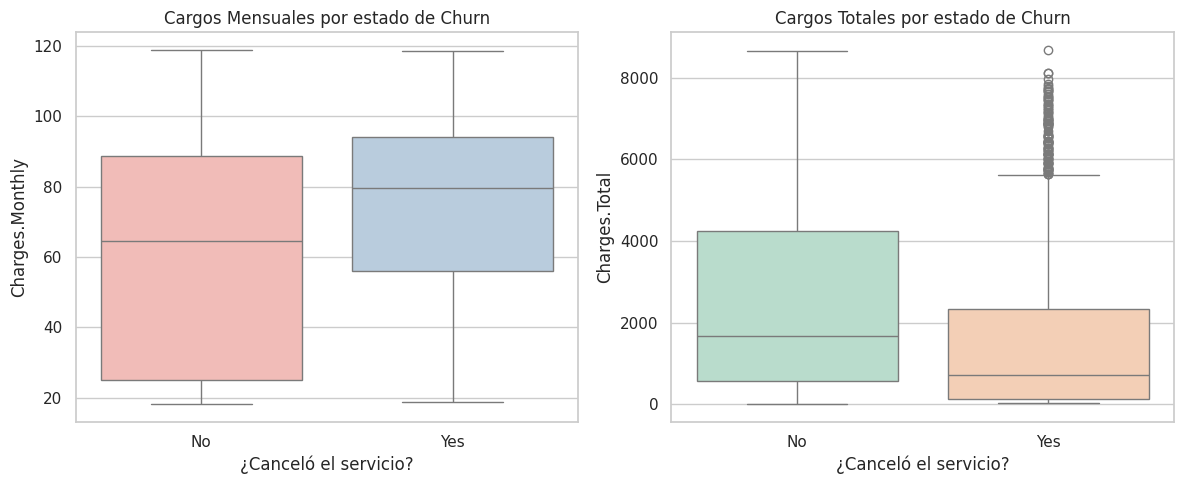

In [107]:
# Gráfico conjunto
plt.figure(figsize=(12, 5))

# Monthly Charges vs Churn
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='Pastel1')
plt.title("Cargos Mensuales por estado de Churn")
plt.ylabel("Charges.Monthly")
plt.xlabel("¿Canceló el servicio?")

# Total Charges vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Charges.Total', palette='Pastel2')
plt.title("Cargos Totales por estado de Churn")
plt.ylabel("Charges.Total")
plt.xlabel("¿Canceló el servicio?")

plt.tight_layout()
plt.show()


In [108]:
# Asegurarse de que los cargos totales sean numéricos
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Filtrar clientes con PaperlessBilling = Yes y que hayan pagado algo (> 0)
clientes_paperless = df_normalizado[
    (df['PaperlessBilling'] == "Yes") &
    (df['Charges.Total'] > 0)
]


<ipython-input-108-f73cf7f5b0fd>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clientes_paperless = df_normalizado[


<ipython-input-109-4e1ba3550359>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clientes_paperless, x='PaymentMethod', order=clientes_paperless['PaymentMethod'].value_counts().index, palette='Accent')


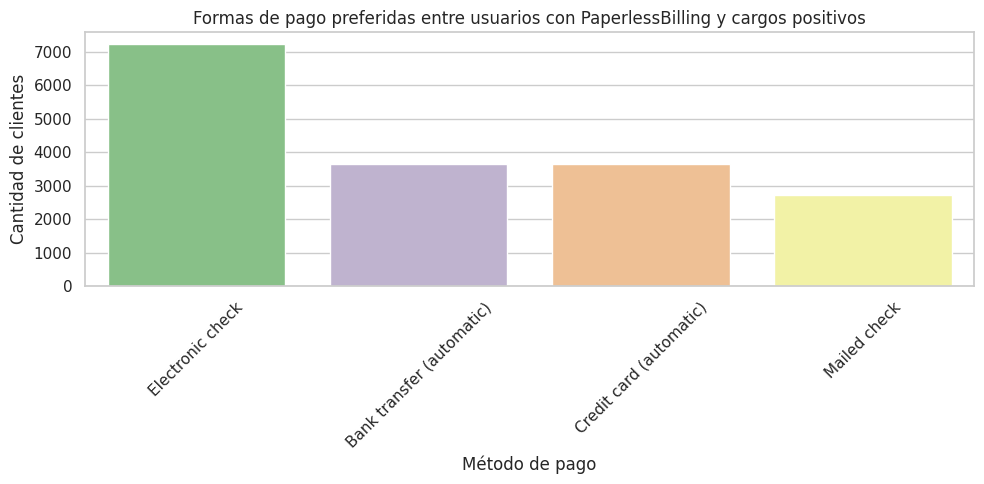

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(data=clientes_paperless, x='PaymentMethod', order=clientes_paperless['PaymentMethod'].value_counts().index, palette='Accent')
plt.title("Formas de pago preferidas entre usuarios con PaperlessBilling y cargos positivos")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [114]:
df_normalizado.columns.str.lower().str.replace(' ', '_')

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges.monthly', 'charges.total'],
      dtype='object')

In [115]:
df_normalizado .isnull().sum()

,0
gender,21801
SeniorCitizen,21801
Partner,21801
Dependents,21801
tenure,21801
PhoneService,21801
MultipleLines,21801
InternetService,21801
OnlineSecurity,21801
OnlineBackup,21801


In [116]:
df_normalizado.duplicated().sum()

np.int64(21114)

In [117]:
df_normalizado.drop_duplicates()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0.0,Yes,Yes,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,0.0,No,No,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,0.0,No,No,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,1.0,Yes,No,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,1.0,Yes,No,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One year,No,Mailed check,55.15,742.9
7263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,50.30,92.75
7265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two year,No,Mailed check,67.85,4627.65


In [118]:
df_normalizado.replace({"Yes": 1, "No": 0}, inplace=True)
df_normalizado.head()

<ipython-input-118-c75a7eeb1600>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado.replace({"Yes": 1, "No": 0}, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0.0,1.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,0.0,0.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,1.0,1.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,1.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df_normalizado.fillna(0)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0.0,1.0,1.0,9.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0
1,Male,0.0,0.0,0.0,9.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0
2,Male,0.0,0.0,0.0,4.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0
3,Male,1.0,1.0,0.0,13.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0
4,Female,1.0,1.0,0.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,One year,0.0,Mailed check,55.15,742.9
7263,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Month-to-month,1.0,Electronic check,85.10,1873.7
7264,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Month-to-month,1.0,Mailed check,50.30,92.75
7265,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,Two year,0.0,Mailed check,67.85,4627.65


FileNotFoundError: [Errno 2] No such file or directory: 'img/Evasion_de_clientes_por_variables_categoricas.png'

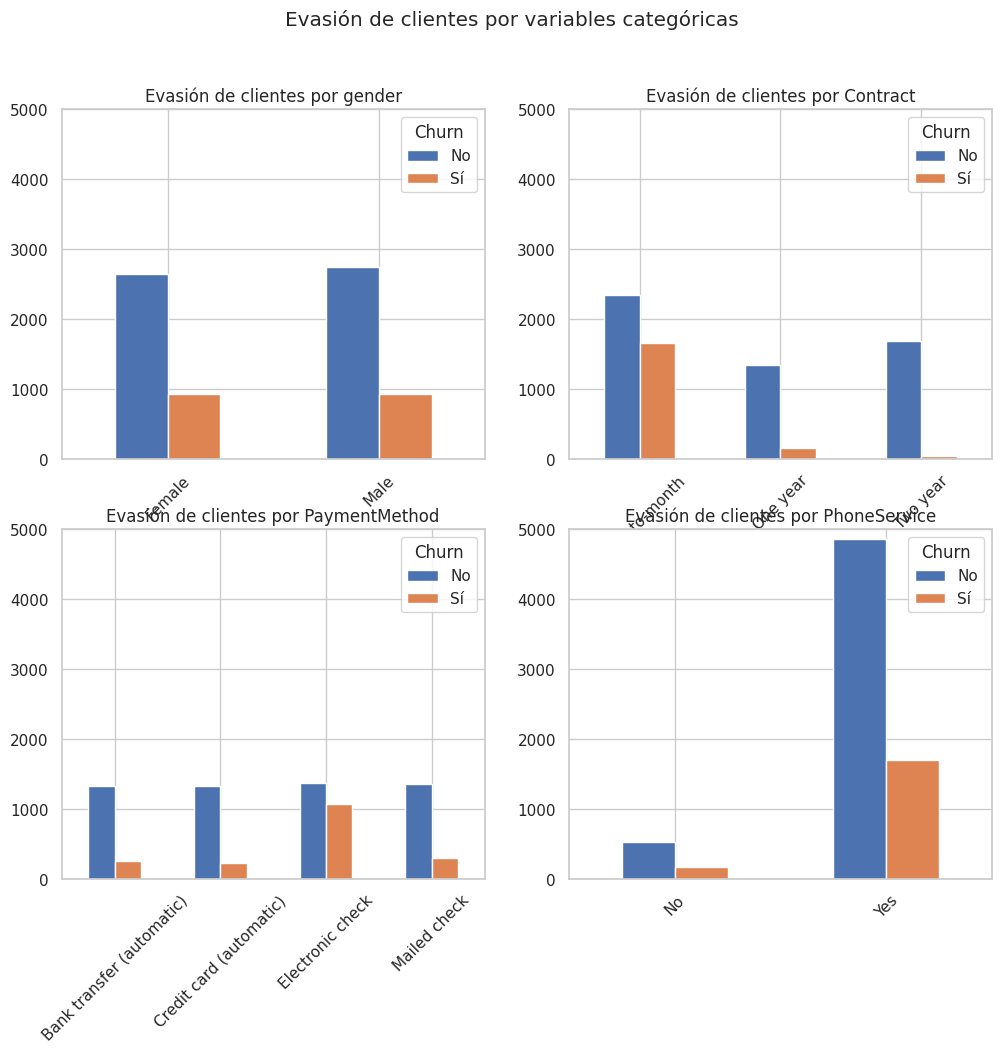

In [106]:
bar_cols = ["gender", "Contract", "PaymentMethod", "PhoneService"]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evasión de clientes por variables categóricas")
axes = ax.flatten()

for i, col in enumerate(bar_cols):
    cross = pd.crosstab(df[col], df["Churn"])
    cross.plot(kind="bar", ax=axes[i], rot=45)
    axes[i].set_title(f"Evasión de clientes por {bar_cols[i]}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_ylim(0, 5000)
    axes[i].legend(title="Churn", labels=["No", "Sí"])

plt.savefig("img/Evasion_de_clientes_por_variables_categoricas.png")
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [ ]:

# SeniorCitizen: ¿Cuántos adultos mayores contrataron el servicio?
print("▶️ Adultos mayores (1 = sí, 0 = no):")
print(df['SeniorCitizen'].value_counts())
print(df['SeniorCitizen'].value_counts(normalize=True) * 100)
print()


# PhoneService: ¿Hay demanda en servicio telefónico?
print("▶️ Servicio telefónico:")
print(df['PhoneService'].value_counts())
print(df['PhoneService'].value_counts(normalize=True) * 100)
print()

# MultipleLines: ¿Lo usan en trabajo y vida diaria?
print("▶️ Múltiples líneas:")
print(df['MultipleLines'].value_counts())
print(df['MultipleLines'].value_counts(normalize=True) * 100)
print()

# InternetService: Calidad y tipo de conexión
print("▶️ Tipo de servicio de internet:")
print(df['InternetService'].value_counts())
print(df['InternetService'].value_counts(normalize=True) * 100)
print()

# OnlineSecurity: ¿Los datos están asegurados?
print("▶️ Seguridad en línea:")
print(df['OnlineSecurity'].value_counts())
print(df['OnlineSecurity'].value_counts(normalize=True) * 100)
print()

# OnlineBackup: ¿Estamos atentos al usuario?
print("▶️ Respaldo en línea:")
print(df['OnlineBackup'].value_counts())
print(df['OnlineBackup'].value_counts(normalize=True) * 100)
print()

# TechSupport: Soporte técnico
print("▶️ Soporte técnico:")
print(df['TechSupport'].value_counts())
print(df['TechSupport'].value_counts(normalize=True) * 100)
print()



# PaperlessBilling: ¿Cuántos usan facturación sin papel?
print("▶️ Facturación sin papel:")
print(df['PaperlessBilling'].value_counts())
print(df['PaperlessBilling'].value_counts(normalize=True) * 100)
print()

#PaymentMethod: ¿Qué métodos de pago se prefieren?
print("▶️ Método de pago:")
print(df['PaymentMethod'].value_counts())
print(df['PaymentMethod'].value_counts(normalize=True) * 100)
print()

# Charges.Monthly: ¿Cuánto se factura mensualmente?
print("▶️ Facturación mensual:")
print(df['Charges.Monthly'].describe())
print()

# Charges.Total: ¿Qué servicios son más requeridos?
print("▶️ Facturación total acumulada:")
print(df['Charges.Total'].describe())
print()


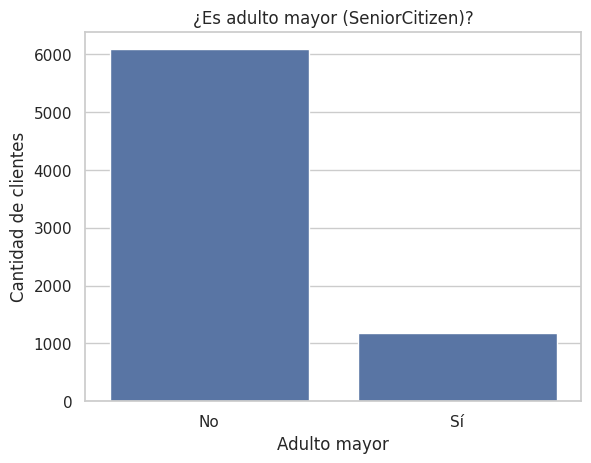

In [121]:
# Gráfico: Proporción de adultos mayores
sns.countplot(data=df, x='SeniorCitizen')
plt.title('¿Es adulto mayor (SeniorCitizen)?')
plt.xticks([0, 1], ['No', 'Sí'])
plt.xlabel('Adulto mayor')
plt.ylabel('Cantidad de clientes')
plt.show()


📌 Resultado:

83,7 % no son adultos mayores.

16,3 % sí lo son.

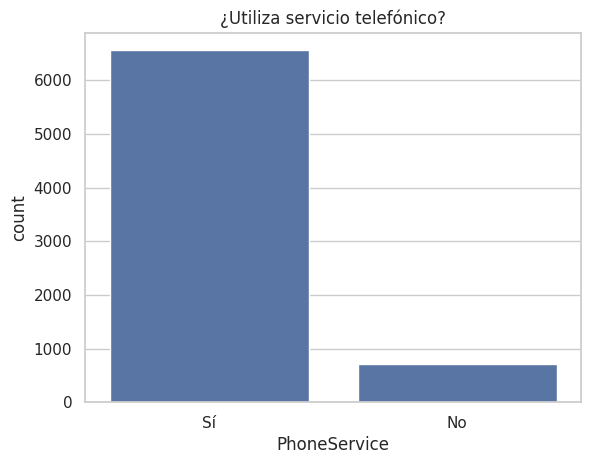

In [133]:
sns.countplot(data=df, x='PhoneService')
plt.title('¿Utiliza servicio telefónico?')
plt.xticks([0, 1], ['Sí', 'No'])
plt.show()


📌 Resultado:
90,3 % sí lo usan.
9,7 % no tienen teléfono.



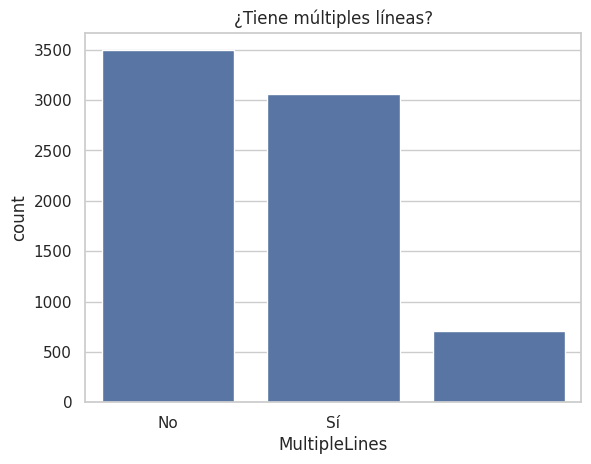

In [123]:
sns.countplot(data=df, x='MultipleLines')
plt.title('¿Tiene múltiples líneas?')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


📌 Resultado:

57,8 % no usan múltiples líneas.

42,2 % sí lo hacen.


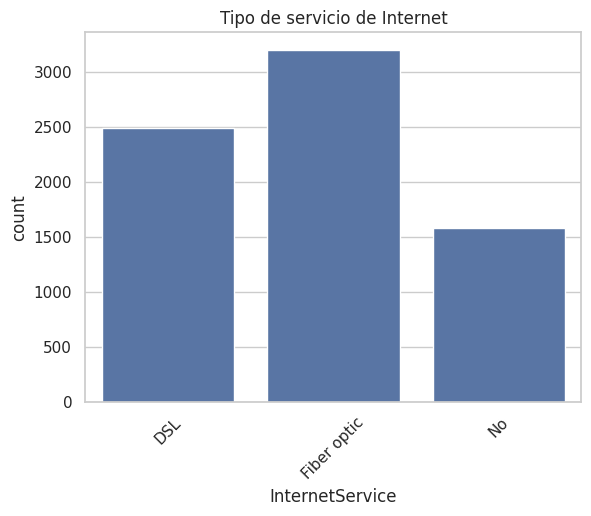

In [124]:
sns.countplot(data=df, x='InternetService')
plt.title('Tipo de servicio de Internet')
plt.xticks(rotation=45)
plt.show()


📌 Resultado:

44 % usan fibra óptica.

34,2 % usan DSL.

21,8 % no tienen internet.

<ipython-input-132-c545812880ba>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['No', 'Sí'])
<ipython-input-132-c545812880ba>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Sí', 'No'])


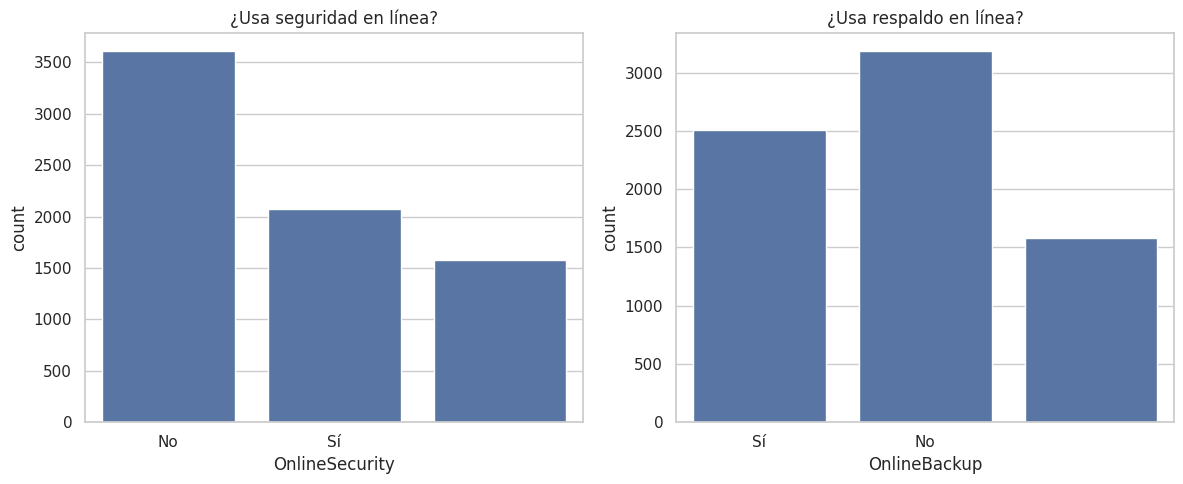

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=df, x='OnlineSecurity', ax=axs[0])
axs[0].set_title('¿Usa seguridad en línea?')
axs[0].set_xticklabels(['No', 'Sí'])

sns.countplot(data=df, x='OnlineBackup', ax=axs[1])
axs[1].set_title('¿Usa respaldo en línea?')
axs[1].set_xticklabels(['Sí', 'No'])
plt.tight_layout()
plt.show()


📌 Seguridad:

71,4 % no usan seguridad.

28,6 % sí.

📌 Respaldo:

65,5 % no usan backup.

34,5 % sí.

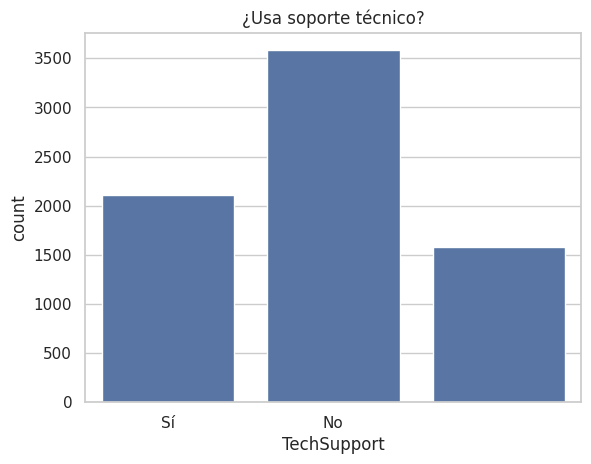

In [131]:
sns.countplot(data=df, x='TechSupport')
plt.title('¿Usa soporte técnico?')
plt.xticks([0, 1], ['Sí', 'No'])
plt.show()


71 % no lo usan.

29 % sí.

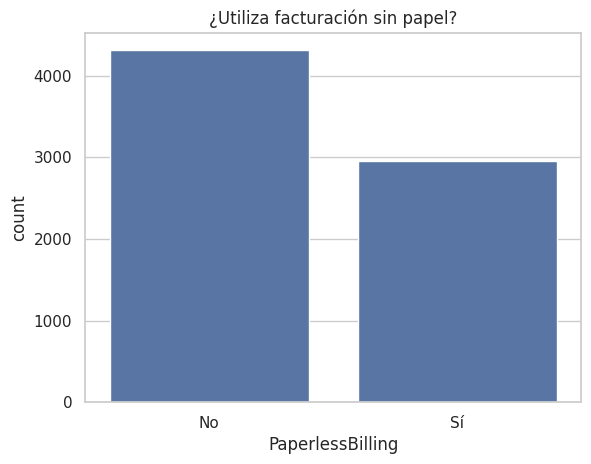

In [127]:
sns.countplot(data=df, x='PaperlessBilling')
plt.title('¿Utiliza facturación sin papel?')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


📌 Resultado:

59,3 % sí usan facturación electrónica.

40,7 % no.

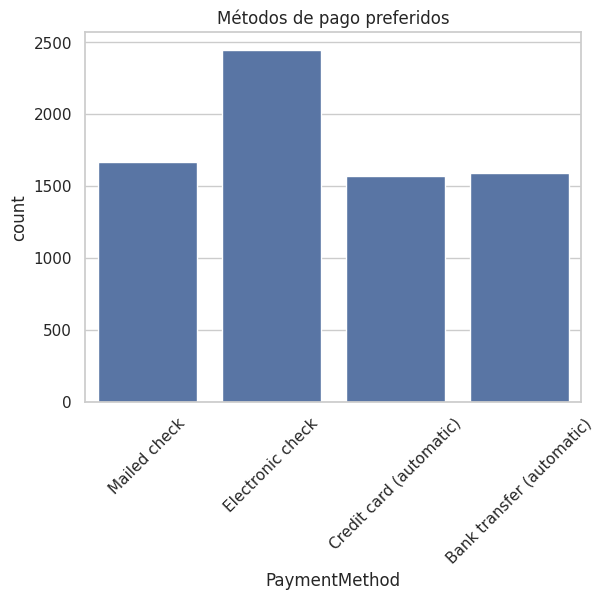

In [128]:
sns.countplot(data=df, x='PaymentMethod')
plt.title('Métodos de pago preferidos')
plt.xticks(rotation=45)
plt.show()


📌 Resultados:

33,6 % usan cheque electrónico.

22,9 % prefieren cheque físico.

21,9 % transferencia bancaria automática.

21,6 % tarjeta de crédito automática.



<ipython-input-130-8007bcd0c677>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Contract", y='Charges.Monthly', ax=axs[0], palette='Blues_d')
<ipython-input-130-8007bcd0c677>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Contract", y='Charges.Total', ax=axs[1], palette='Reds_d')


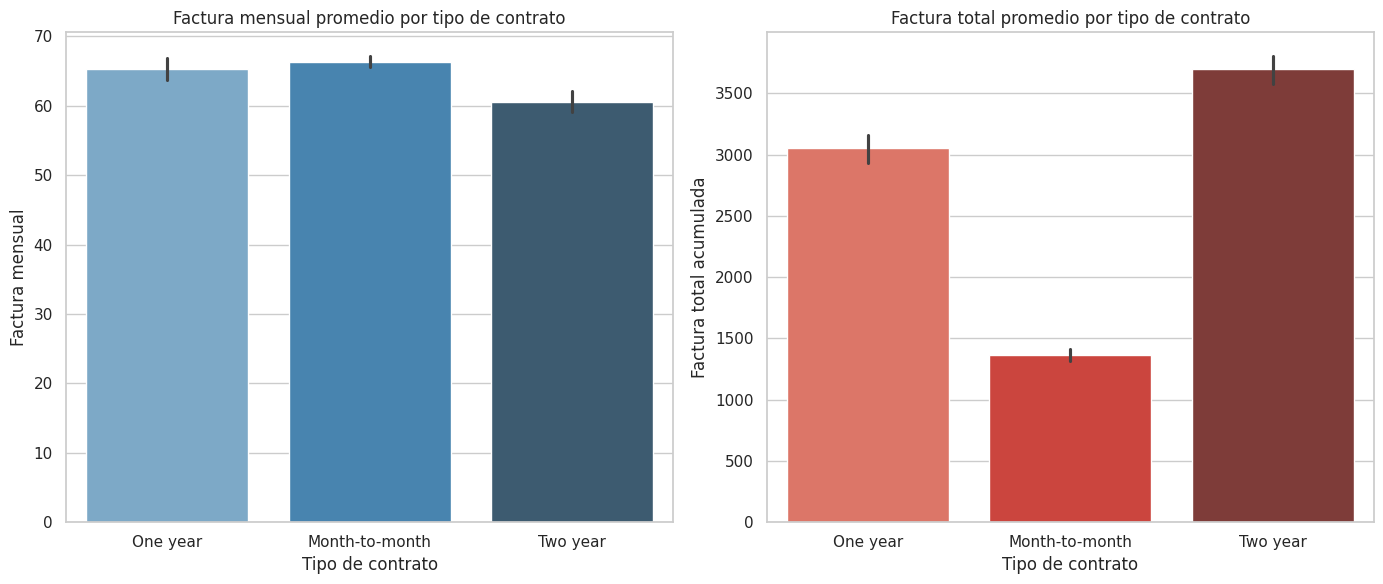

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Factura mensual promedio por tipo de contrato
sns.barplot(data=df, x="Contract", y='Charges.Monthly', ax=axs[0], palette='Blues_d')
axs[0].set_title('Factura mensual promedio por tipo de contrato')
axs[0].set_ylabel('Factura mensual')
axs[0].set_xlabel('Tipo de contrato')

# Factura total promedio por tipo de contrato
sns.barplot(data=df, x="Contract", y='Charges.Total', ax=axs[1], palette='Reds_d')
axs[1].set_title('Factura total promedio por tipo de contrato')
axs[1].set_ylabel('Factura total acumulada')
axs[1].set_xlabel('Tipo de contrato')

plt.tight_layout()
plt.show()


📌 Mensual:

Media: $64,7

Mediana: $70,3

📌 Total acumulado:

Media: $2280,6

Mediana: $1391



#📄Informe final

📶 Servicios más usados: Teléfono e internet con fibra óptica. Pero muchos no usan seguridad ni soporte técnico.

👴 Adultos mayores son minoría (16,3 %), pero podrían beneficiarse más con soporte técnico.

📤 Facturación electrónica es preferida por la mayoría.

💳 Cheque electrónico domina como método de pago, seguido por cheque físico.

💰 Hay gran variabilidad en los gastos mensuales y totales, lo que se puede analizar por tipo de contrato o servicios contratados.

Teniendo en cuenta las variables analizadas se puede observar que es

muy importante el primer mes del servicio ya que el usuario cancela

por lo que se recomienda realizar contratos bimestrales o

trimestrales ; el mayor servicio requerido es el telefónico, se

observó que es mayor la cancelación de aquellos que tienen

facturación total que la mensual Mes a mes (Month-to-month):

Es el tipo de contrato más flexible y sin compromiso a largo plazo.

Sin embargo, tiene la factura mensual más alta. Esto se debe a que no hay descuentos por permanencia.

Este tipo de contrato es el más común entre clientes que luego cancelan (churn alto).

🔸 Un año / Dos años (One year / Two year):

Tienen un costo mensual menor en comparación con los contratos mes a mes.

Las empresas usualmente ofrecen descuentos o tarifas promocionales si el cliente se compromete a un período largo.

Esto atrae a usuarios más estables (mayor fidelización, menor churn).

Factura total acumulada (Charges.Total) por tipo de contrato

🔹 Contratos de dos años muestran los mayores montos acumulados:

Aunque pagan menos por mes, permanecen más tiempo, por lo tanto acumulan más facturación.

Representan los clientes más fieles y valiosos a largo plazo para la empresa.

🔸 Contratos mes a mes tienen la factura total más baja:

Estos clientes permanecen menos tiempo (tenure corto), por lo que no alcanzan a acumular muchos cargos totales.

Son más propensos a cancelar si no están satisfechos o si ven opciones más económicas.

En cuanto al analisis por genero observamos que es indistinto porque replican la misma conducta.
En cuanto a otros servicios prefieren servicio de Internet  Fibra Optica un 44% y por lo general los servicios menos usados son: soporte técnico, seguridad, backup. El sercicio telefónico es el más requerido.
